# WITH SEABORN

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
kill = pd.read_csv('/content/PoliceKillingsUS.csv', encoding="windows-1252")

In [ ]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.shape

(2535, 14)

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

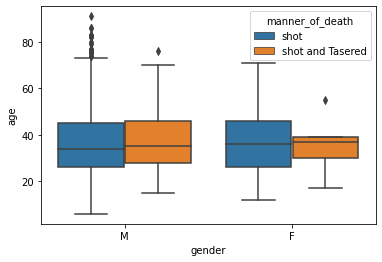

In [ ]:
# with seaborn
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill);

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

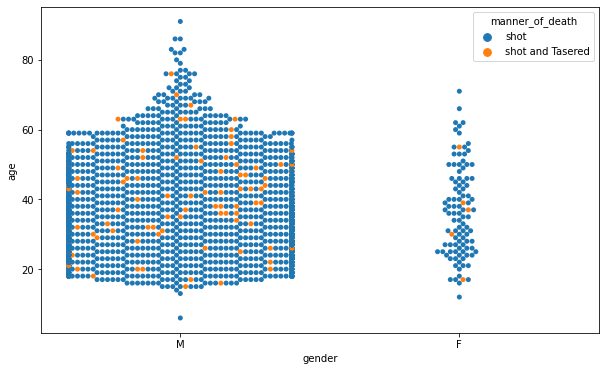

In [ ]:
# with seaborn
plt.figure(figsize=(10, 6))
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill);

## 2: Plot 12 most dangerous cities

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
Indianapolis     14
St. Louis        14
Oklahoma City    13
Name: city, dtype: int64

In [ ]:
kill["city"].value_counts()[0:12]

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [ ]:
kill_city_unique = kill["city"].value_counts().reset_index()["index"][0:12]
kill_city_count = kill["city"].value_counts()[0:12]

In [ ]:
kill_city_countplot = kill["city"].value_counts()[0:12]

In [ ]:
kill_city = kill["city"].value_counts().reset_index()[0:12]
kill_city.columns = ["city", "count"]

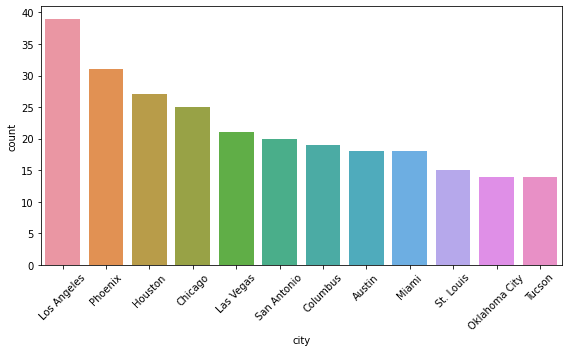

In [ ]:
# with seaborn barplot
plt.figure(figsize=(8, 5))
sns.barplot(data= kill_city, x="city", y="count");
plt.xticks(rotation=45)
plt.tight_layout()

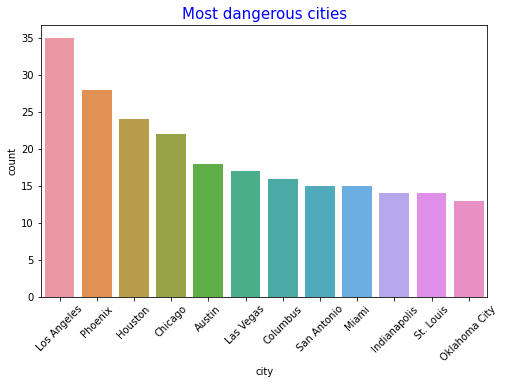

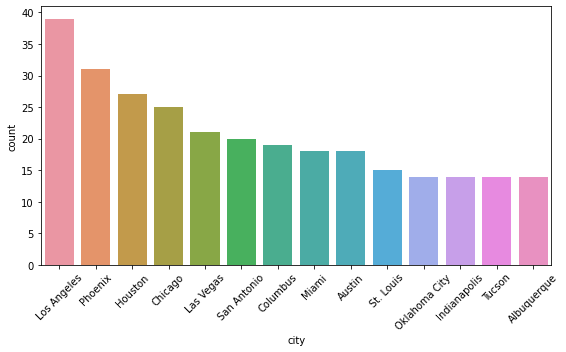

In [ ]:
# with seaborn countplot
kill["city_count"] = kill.groupby("city")["name"].transform("count")
plt.figure(figsize=(8, 5))
sns.countplot(data=kill[kill["city_count"]>13].sort_values(by="city_count", ascending=False), x="city");
plt.xticks(rotation=45)
plt.tight_layout()

.c## 3: Plot 20 most dangerous states

In [ ]:
kill["state"].value_counts()[0:20]

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

In [ ]:
kill_state= kill["state"].value_counts()[0:20].reset_index()
kill_state.columns = ["state", "count"]

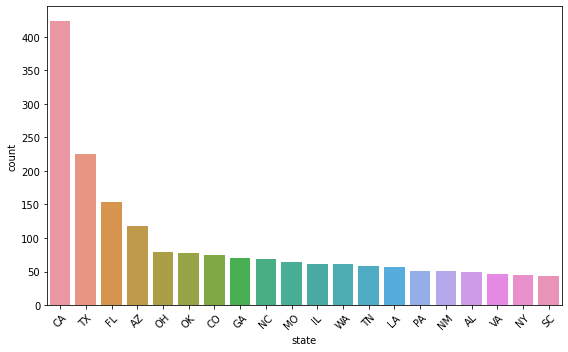

In [ ]:
# with seaborn barplot

plt.figure(figsize=(8, 5))
sns.barplot(data= kill_state, y="count", x="state");
plt.xticks(rotation=45)
plt.tight_layout()

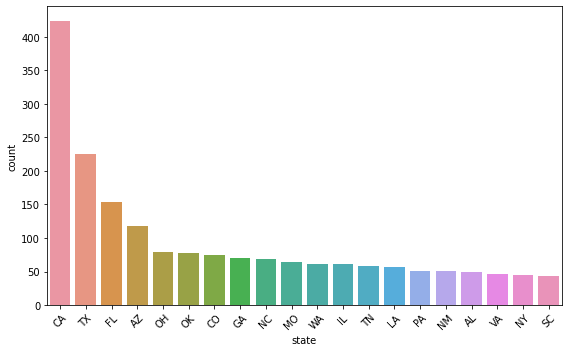

In [ ]:
# with seaborn countplot
kill["state_count"] = kill.groupby("state")["name"].transform("count")
plt.figure(figsize=(8, 5))
sns.countplot(data=kill[kill["state_count"]>43].sort_values(by="state_count", ascending=False), x="state");
plt.xticks(rotation=45)
plt.tight_layout()

## 4: Plot Having mental ilness or not for killed people

In [ ]:
kill["signs_of_mental_illness"].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

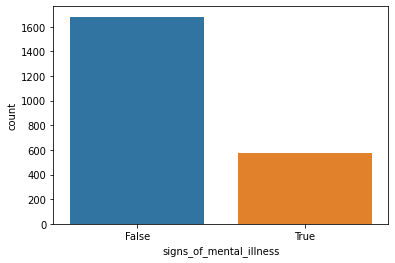

In [ ]:
# with seaborn
sns.countplot(data=kill, x="signs_of_mental_illness")

## 5: Plot number of Threat Types

In [ ]:
kill["threat_level"].value_counts()

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

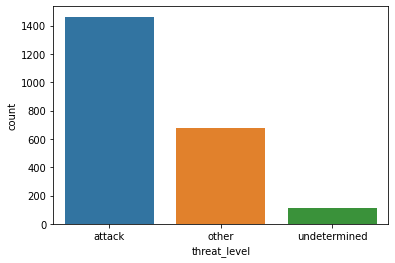

In [ ]:
# with seaborn
sns.countplot(data=kill, x="threat_level");

## 6: Plot number of Flee Types

In [ ]:
kill["flee"].value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

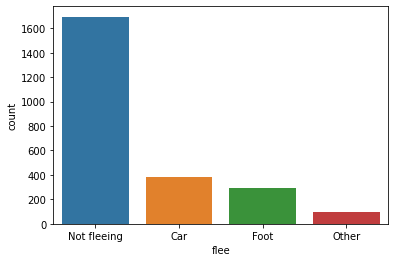

In [ ]:
# with seaborn
sns.countplot(data=kill, x="flee");